In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

1. csv 폴더에 있는 'drinks.csv'파일을 로드 
2. 데이터프레임에서 결측치가 존재하는가?
3. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '위스키소비량', '와인소비량', '순수알콜량', '대륙']
4. 대륙 컬럼에 결측치 존재 -> 결측치 'OT'로 대체
5. 파생변수 생성
    - 총술소비량 -> 맥주소비량 + 위스키소비량 + 와인소비량
    - 도수 -> (순수알콜량 / 총술소비량) * 100 -> 반올림해서 2자리
6. 어떠한 대륙이 도수가 높은 술을 마시는가?

In [3]:
# 파일을 로드 
drinks = pd.read_csv('../csv/drinks.csv')
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
# 결측치의 개수를 확인 
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [5]:
# 결측치가 존재하는 컬럼은 어디인가?
drinks.isna().any()

country                         False
beer_servings                   False
spirit_servings                 False
wine_servings                   False
total_litres_of_pure_alcohol    False
continent                        True
dtype: bool

In [7]:
# 컬럼의 이름을 변경 
drinks.columns = ['국가', '맥주소비량', '위스키소비량', '와인소비량', '순수알콜량', '대륙']

In [8]:
drinks.head(1)

,국가,맥주소비량,위스키소비량,와인소비량,순수알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS


In [10]:
# 대륙컬럼의 결측치를 OT 대체
drinks['대륙'].fillna('OT', inplace=True)

In [11]:
drinks.isna().sum()

국가        0
맥주소비량     0
위스키소비량    0
와인소비량     0
순수알콜량     0
대륙        0
dtype: int64

In [ ]:
# 파생변수 생성 
# 총술소비량 생성'
drinks['맥주소비량'] + drinks['위스키소비량'] + drinks['와인소비량']

In [18]:
# sum() 함수를 이용
# drinks[ ['맥주소비량', '위스키소비량', '와인소비량'] ]
drinks['총술소비량'] = drinks.loc[:, '맥주소비량' : '와인소비량'].sum(axis=1)

In [24]:
# 도수 생성
# (순수알콜량 / 총술소비량) * 100 -> 반올림
ratio = (drinks['순수알콜량'] / drinks['총술소비량']) * 100
drinks['도수'] = round(ratio, 2).fillna(0)

In [29]:
# 대륙 별 총술소비량이 가장 높은 대륙은 어디인가?
group_data = drinks[ ['대륙', '총술소비량'] ].groupby(['대륙']).sum()
# 총술소비량을 기준으로 데이터를 내림차순 정렬 
group_data.sort_values(['총술소비량'], ascending=False).head(1)

,총술소비량
대륙,
EU,21085


In [30]:
# 대륙 별 도수가 가장 높은 대륙은 어디인가?
group_data2 = drinks[['대륙', '도수']].groupby(['대륙']).mean()
# 도수를 기준으로 내림차순 정렬 
group_data2.sort_values(['도수'], ascending=False)

,도수
대륙,
AF,4.974528
OT,1.786087
SA,1.785833
EU,1.752667
OC,1.690000
AS,1.635682


- 총술소비량을 기준으로 우리나라는 얼마나 많은 술을 먹고 있는가?
    1. 총술소비량을 기준으로 내림차순 정렬 
    2. 인덱스를 초기화하고 기존의 인덱스는 제거 
    3. 국가 컬럼의 데이터가 'South Korea'인 데이터의 인덱스와 총술소비량 데이터를 확인 
    4. 전체 데이터를 기준으로 막대그래프 생성하고 한국의 막대의 색상을 변경하고 주석 추가 

In [31]:
# 복사본 생성 
df = drinks.copy()

In [33]:
# 총술소비량을 기준으로 내림차순 정렬
df.sort_values(['총술소비량'], ascending=False, inplace=True)

In [36]:
# 인덱스를 재지정하고 기존의 인덱스는 제거 
df.reset_index(drop=True, inplace=True)

In [49]:
# South Korea의 데이터를 확인 
# 조건식 생성 -> 국가 컬럼의 데이터가 'South Korea'와 같다면
flag = df['국가'] == 'South Korea'
df.loc[flag].index[0]

98

In [ ]:
# 그래프 시각화
x = df['국가']
y = df['총술소비량']

# 그래프의 사이즈를 변경 
plt.figure(figsize=(20, 30))

plt.barh(x, y)
# x축의 값들을 회전
plt.xticks(rotation=45)

plt.show()

In [54]:
import platform

In [55]:
if platform.system() == 'Darwin':    # MAC 인 경우
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [59]:
df.loc[korea_index, '총술소비량']

165

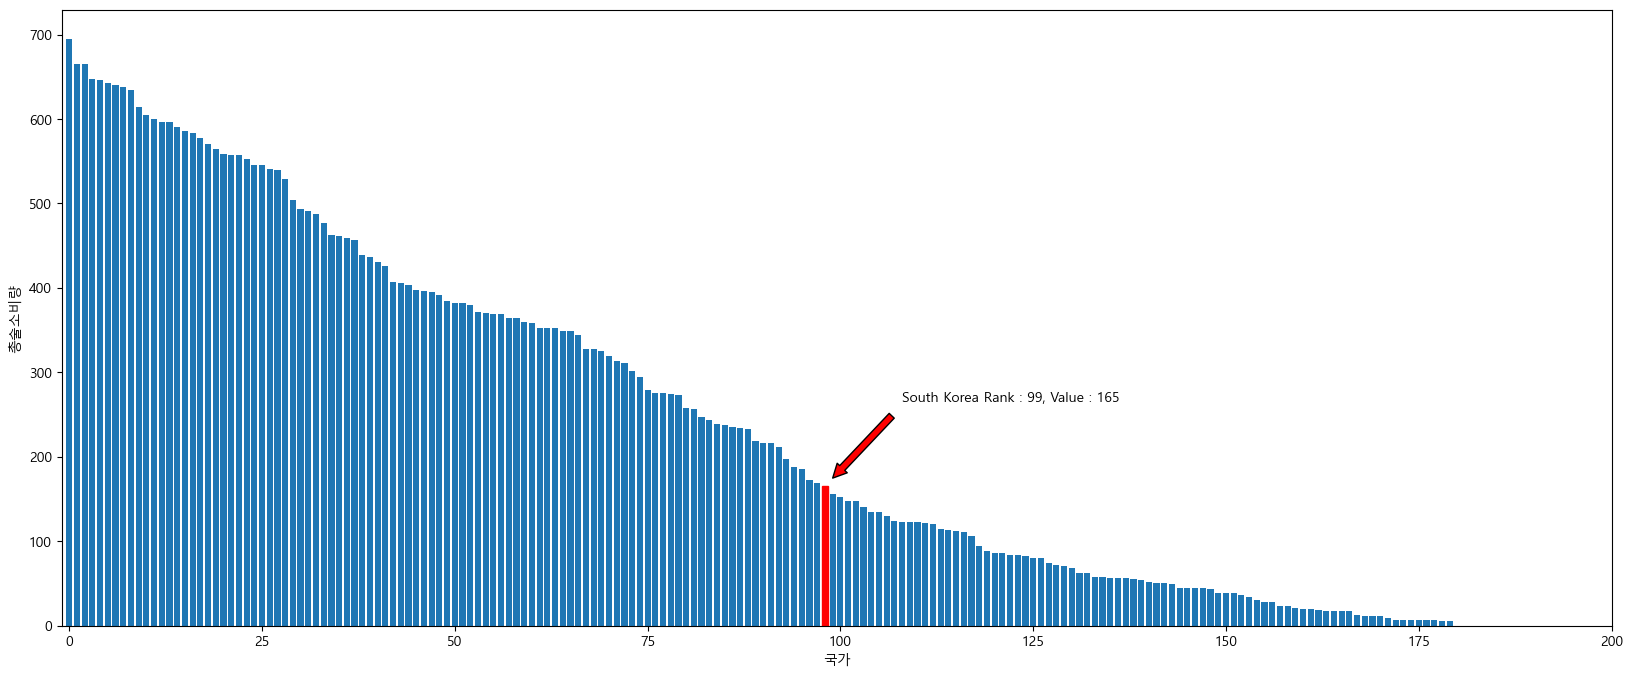

In [63]:
# x축에는 인덱스를 대입 
x = df.index
y = df['총술소비량']

# South Korea의 인덱스를 변수에 저장 
flag = df['국가'] == 'South Korea'
korea_index = df.loc[flag].index[0]
# South Korea의 총술소비량의 value를 변수에 저장
korea_value = df.loc[korea_index, '총술소비량']

plt.figure(figsize=(20, 8))
bar_graph = plt.bar(x, y)
bar_graph[korea_index].set_color('r')

# 주석을 추가 
plt.annotate(
    f"South Korea Rank : {korea_index + 1}, Value : {korea_value}", 
    xy = (korea_index, korea_value), 
    xytext= (korea_index + 10, korea_value + 100), 
    arrowprops= {
        'facecolor' : 'r', 
        'edgecolor' : 'k', 
        'headwidth' : 10, 
        'headlength' : 10, 
        'width' : 5, 
        'shrink' : 0.1
    } 
)

# x축 이름 
plt.xlabel('국가')
# y축 이름 
plt.ylabel('총술소비량')

# x축의 범위를 지정 
plt.xlim(-1, 200)
plt.show()